### Problem Statement :- Predicts the selling price of second-hand cars Using LinearRegression Machine learning algorithm. 

### 1) Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2) Load Dataset

In [34]:
data = pd.read_csv("car data.csv")

### About Dataset

This dataset contains information about used cars.

This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset are as follows:

1) name

2) year

3) selling_price

4) km_driven

5) fuel

6) seller_type

7) transmission

8) Owner

In [36]:
data.head(10) # checking the first five rows from the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [38]:
data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [39]:
data.shape ## printing the no. of columns and rows of the dataframe

(301, 9)

In [40]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
data.isnull().sum()

# finding the count of missing values from different columns

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [42]:
data.describe() # Statistical Information 

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Now the data looks good and there are no missing values. Also, the first cloumn is just Car_Name, so we don' need that column. Let's drop it from data and make it more clean.

In [43]:
data= data.drop(columns = ['Car_Name'])
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Let's visualize the data and analyze the relationship between independent and dependent variables:

In [44]:
Categorical_features = [col for col in data.columns if data[col].dtype == 'O']
Categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission']

In [45]:
numerical_features = [col for col in data.columns if data[col].dtype != 'O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

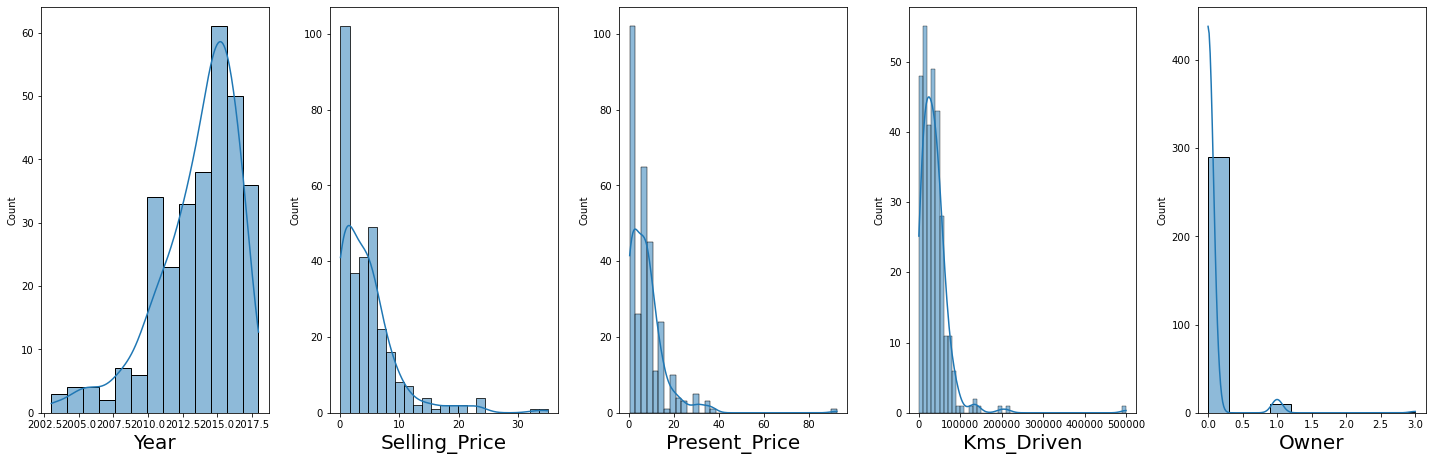

In [46]:
# let's see how numerical_features is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_features:
    if plotnumber<=5 :
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot(data[column],kde = True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

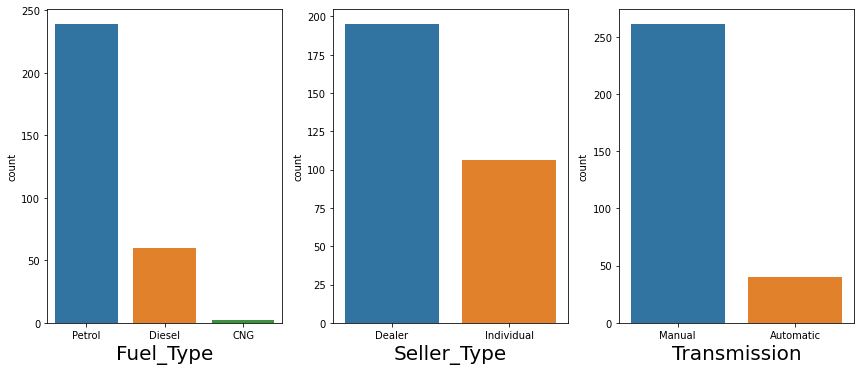

In [47]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Categorical_features:
    if plotnumber<=3 :
        ax = plt.subplot(5,5,plotnumber)
        sns.countplot(x = column,data = data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Handling Categorical variables with More than Two Categories

Let's create a new column for Fuel_Type , Seller_Type , Transmission Columns.

We need to represent the 'Fuel_Type' , 'Seller_Type' , 'Transmission' column numerically Hence, for that we’ll create another dummy variable:

In [50]:
data = pd.get_dummies(data)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


What does the encoding say?

1) For "Fuel_Type" Column 

    CNG is encoded as Fuel_Type_CNG = 1 , Fuel_Type_Diesel = 0 & Fuel_Type_Petrol = 0
    
    Diesel is encoded as Fuel_Type_CNG = 0 , Fuel_Type_Diesel = 1 and Fuel_Type_Petrol = 0

    Petrol is encoded as Fuel_Type_CNG = 0 , Fuel_Type_Diesel = 0 and Fuel_Type_Petrol = 1

2) For "Seller" Column

    Dealer is encoded as Seller_Type_Dealer = 1 & Seller_Type_Individual = 0
    
    Individual is encoded as Seller_Type_Dealer = 0 & Seller_Type_Individual = 1

3) For "Transmission" Column

    Automatic is encoded as Transmission_Automatic = 1 & Transmission_Manual = 0
    
    Individual is encoded as Transmission_Automatic = 0 & Transmission_Manual = 1
     

Now the question is: Why have we used two/one dummy columns instead of three/Two?

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Fuel_Type_Diesel as well as Fuel_Type_Petrol is 0, it automatically means that the data belongs to Fuel_Type_CNG.
This is called handling the dummy variable trap. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns. Let's include the two new dummy variables in the model:

In [51]:
# create X(Independent data) and y(dependent data)
feature = ["Year","Present_Price","Kms_Driven","Owner","Fuel_Type_CNG","Fuel_Type_Diesel","Seller_Type_Dealer","Transmission_Automatic"]
X = data[feature]
y = data.Selling_Price

In [52]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic
0,2014,5.59,27000,0,0,0,1,0
1,2013,9.54,43000,0,0,1,1,0
2,2017,9.85,6900,0,0,0,1,0
3,2011,4.15,5200,0,0,0,1,0
4,2014,6.87,42450,0,0,1,1,0


In [53]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Divide The Dataset into train and test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=5)

In [56]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((225, 8), (225,), (76, 8), (76,))

### Implementation of LinearRegression Model

In [58]:
from sklearn.linear_model import LinearRegression


In [59]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
prediction = lr.predict(x_test)

In [35]:
lr.score(x_train,y_train) ## training score

0.8799908666232623

In [37]:
lr.score(x_test,y_test) ## test score

0.8608525898495389

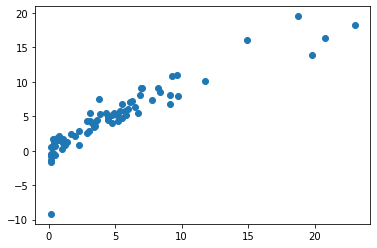

In [38]:
plt.scatter(y_test,prediction) ## plot y_test v/s prediction value of model

### Evolution Metrics of model

In [41]:
from sklearn import metrics

In [42]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.1409961087856992
MSE :  3.2815963416670617
RMSE :  1.8115176901336243
R squared :  0.8608525898495389


### Implementation of Regularization Model

### 1) LASSO (L1-Norm) 

In [44]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [54]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lassocv = LassoCV(alphas = None,cv =10, max_iter = 100000,normalize = True)
lassocv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [55]:
# best alpha parameter
alpha = lassocv.alpha_
alpha

0.014905096676743052

In [56]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.014905096676743052)

In [57]:
prediction = lasso_reg.predict(x_test)

In [58]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.1318151217096541
MSE :  3.3386758590846095
RMSE :  1.8272043835008194
R squared :  0.8584322839391372


### 2) Ridge(L2-Norm)

In [59]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.6906836 , 2.59960857, 8.12639411, 1.61598335, 4.16685595,
       5.09373017, 2.06237126, 9.93194163, 5.84637547, 6.42196261,
       3.63917991, 8.05612584, 2.88051393, 1.63675005, 9.90353569,
       8.80318691, 8.25077244, 5.88203548, 9.32860793, 1.22842734,
       8.39177915, 9.06553571, 7.1212448 , 5.92935654, 4.9152103 ,
       1.73100406, 5.39842325, 0.78988506, 5.13973145, 7.37094895,
       6.01757596, 5.3938236 , 8.98625131, 2.96162805, 3.68449987,
       2.6926045 , 3.17235751, 0.92019116, 9.19378148, 4.25682258,
       5.86813771, 1.73632283, 3.32712328, 3.60451109, 1.29938048,
       8.50864923, 9.59323106, 5.00713259, 9.75804357, 8.6867954 ]),
        cv=10, normalize=True)

In [60]:
ridgecv.alpha_

0.789885059103369

In [61]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.789885059103369)

In [63]:
prediction = ridge_model.predict(x_test)

In [64]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.1338944072792678
MSE :  3.2712447136861806
RMSE :  1.8086582633781818
R squared :  0.8612915232448782


### 3) Elastic Net

In [71]:
elasticCV = ElasticNetCV(alphas = None, cv =10, max_iter = 100000,normalize = True)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10, max_iter=100000, normalize=True)

In [72]:
elasticCV.alpha_

0.0014836603477759683

In [73]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal preference to L1 and L2
elasticCV.l1_ratio

0.5

In [74]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0014836603477759683)

In [75]:
prediction = elasticnet_reg.predict(x_test)

In [76]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.138178004371527
MSE :  3.2820060378660005
RMSE :  1.811630767531287
R squared :  0.860835217766231


### Prediction

In [82]:
Year = int(input("Enter Year of Purchase : "))
Present_Price = int(input("Enter Showroom Price of your car : "))
Kms_Driven = int(input("How many kilometer drive : "))
Owner = int(input("How much owners previously the car had? (0,1 or 2) : "))
Fuel_Type = str(input("What is fuel type? (CNG , DIESEL , PETROL) : "))
Seller_Type = str(input("Are u Dealer or Individual ? : "))
Transmission = str(input("Enter Transmission Type : (Automatic , Manual Car) : "))

Enter Year of Purchase : 2015
Enter Showroom Price of your car : 250000
How many kilometer drive : 100
How much owners previously the car had? (0,1 or 2) : 1
What is fuel type? (CNG , DIESEL , PETROL) : CNG
Are u Dealer or Individual ? : Dealer
Enter Transmission Type : (Automatic , Manual Car) : Manual Car


In [85]:
if Fuel_Type == "CNG" :
    Fuel_Type_CNG , Fuel_Type_Diesel = 1 , 0
elif Fuel_Type == "DIESEL":
    Fuel_Type_CNG , Fuel_Type_Diesel = 0 , 1
else:
    Fuel_Type_CNG , Fuel_Type_Diesel = 0 , 0

In [86]:
if Seller_Type == "Dealer":
    Seller_Type_Dealer = 1
else:
    Seller_Type_Dealer = 0

In [87]:
if Transmission == "Automatic":
    Transmission_Automatic = 1
else:
    Transmission_Automatic = 0

In [90]:
prediction_value = lr.predict([[Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic]])
print("Predicted value : ",prediction_value[0])    

Predicted value :  110015.88909564455
